In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib
import cv2
import os

In [72]:
#Specifying the number of classes and images to use
n_classes = 2;
n_figs = 4;

#Specifying the total number of classes and images avaialble
N_classes = 45;
N_figs = 700;

#Randomly choosing the classes and figures to analyze
class_idx = np.random.randint(N_classes,size=n_classes);
fig_idx = np.random.randint(N_figs,size=n_figs);
#These two lines above generate different choices each time they're executed unless the random seed is reset

In [73]:
#Specifying the path
PROJECT_ROOT_DIR = '..'
DATASET_FOLDER = 'training_data'
DATASET_PATH = os.path.join(PROJECT_ROOT_DIR,DATASET_FOLDER)


#Reading the folders tree
classes_all = sorted(os.listdir(DATASET_PATH));
classes_all.remove('summary'); #Removes the summary file
N_classes = len(classes_all)
if n_classes > 0 and n_classes <= N_classes:
    classes = [classes_all[idx] for idx in class_idx]
else:
    print('Wrong number of classes requested')
    raise SystemExit(0)
    
#Reading the figures
figs = [];
for folder in classes:
    CLASS_PATH = os.path.join(DATASET_PATH, folder);
    figs_names_all = sorted(os.listdir(CLASS_PATH));
    if n_figs > 0 and n_figs <= N_figs:
        figs_names = [figs_names_all[idx] for idx in fig_idx]
        FIGS_PATHS = [os.path.join(CLASS_PATH, fig) for fig in figs_names]
        figs_i = [cv2.imread(PATH,0) for PATH in FIGS_PATHS]; #cv2.imread with flag 0 reads the image in grayscale
        figs.append(figs_i)
    else:
        print('Wrong number of figures requested')
        raise SystemExit(0)

In [74]:
#Shows the names of the chosen classes and their corresponding indexes in figs
print('Chosen classes:')
print(list(enumerate(classes)))

print(classes[0])

Chosen classes:
[(0, 'bridge'), (1, 'river')]
bridge


[[206 205 198 ... 163 159 160]
 [194 199 198 ... 160 163 169]
 [202 206 202 ... 166 163 163]
 ...
 [ 46  46  45 ...  52  58  57]
 [ 46  46  45 ...  74  81  61]
 [ 46  46  45 ...  74  87  52]]
(256, 256)


(-0.5, 255.5, 255.5, -0.5)

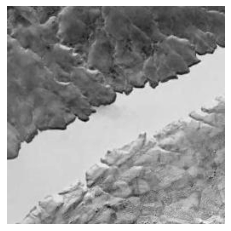

In [75]:
#Visualizing some of the data
fig_test = figs[1][2];
print(fig_test)
print(np.shape(fig_test))
plt.imshow(fig_test, cmap = matplotlib.cm.binary); plt.axis("off")

In [76]:
train_split = 0.75  # must be divisible with n_figs
test_split = 0.25

training_data = np.empty((int(n_classes*n_figs*train_split), 256*256))
testing_data = np.empty((int(n_classes*n_figs*test_split), 256*256))

training_labels=[]
testing_labels=[]

c = -1
d = -1
for i in range(n_classes):
    for j in range(n_figs):
        if j < n_figs*train_split:
            c = c+1
            #training_labels[c] = classes[i]
            training_labels.append(classes[i])
            training_data[c,:] = figs[i][j].flatten()
        elif j >= n_figs*train_split:
            d = d+1
            #testing_labels[d] = classes[i]
            testing_labels.append(classes[i])
            testing_data[d,:] = figs[i][j].flatten()
        
print(training_data)
print(training_data.shape)

[[218. 216. 213. ... 226. 200.  67.]
 [ 50.  47.  49. ...  49.  51.  48.]
 [ 47.  51.  57. ...  82.  80.  78.]
 [180. 185. 186. ...  80.  80.  80.]
 [ 39.  38.  36. ...  52.  56.  60.]
 [206. 205. 198. ...  74.  87.  52.]]
(6, 65536)


## Implementation of KNN classification

In [83]:
def l2_distance(x1, x2):
    d = np.linalg.norm(x1-x2)
    return d

def knn(test_point, training_data, training_labels, k):
    n = training_data.shape[0]
    distances = np.empty((n))
    for i in range(n):
        distances[i] = l2_distance(training_data[i,:], test_point)
    
    print(distances)
    print(np.argpartition(distances, k))
    inds = np.argpartition(distances, k)[:k]
    labels = [training_labels[i] for i in inds]
    print(labels)
    c = Counter(labels)
    prediction = c.most_common(1)
                            
    return prediction


p = knn(testing_data[0], training_data, training_labels, int(n_figs*train_split))
print(f'Prediction: {p[0][0]}, Truth: {testing_labels[0]} ')
                            
    

[17451.84944354 10239.75409861 11466.65321705 18297.37866472
 11796.37647755 18072.16832591]
[4 2 1 0 3 5]
['river', 'bridge', 'bridge']
Prediction: bridge, Truth: bridge 
